In [1]:
#Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat  
%matplotlib inline
data=loadmat('ex3data1.mat')
weights=loadmat('ex3weights.mat')
print(data['X'].shape)
print(data['y'].shape)
print(data.keys())
print(weights.keys())

(5000, 400)
(5000, 1)
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])


In [2]:
#Loading The Data
#Adding Intercept Value
X=np.c_[np.ones((data['X'].shape[0],1)),data['X']]
y=data['y']
#Adding The Theta Values
theta1=weights['Theta1']
theta2=weights['Theta2']

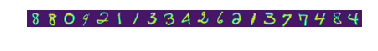

In [3]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [4]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=1)
print(train_X)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [10]:
from sklearn.linear_model import LogisticRegression
log_Reg=LogisticRegression(max_iter=100000,C=1,random_state=0, multi_class='ovr')
log_Reg.fit(train_X,train_y)

C:\Users\asingh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = log_Reg.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
confusion_matrix

array([[ 97,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  78,   2,   4,   0,   4,   3,   3,   0,   3],
       [  1,   6, 105,   0,   5,   0,   1,   0,   0,   0],
       [  0,   2,   0,  80,   0,   3,   0,   0,   5,   1],
       [  0,   2,   6,   1,  89,   1,   0,   3,   1,   0],
       [  0,   0,   0,   0,   1,  82,   0,   0,   0,   1],
       [  4,   1,   0,   0,   1,   0, 104,   0,   4,   0],
       [  4,   1,   1,   1,   3,   1,   0,  89,   2,   0],
       [  2,   1,   0,   2,   0,   0,   5,   1,  80,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,  99]], dtype=int64)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        97
          2       0.86      0.78      0.82       100
          3       0.91      0.89      0.90       118
          4       0.91      0.88      0.89        91
          5       0.90      0.86      0.88       103
          6       0.90      0.98      0.94        84
          7       0.92      0.91      0.92       114
          8       0.93      0.87      0.90       102
          9       0.87      0.88      0.87        91
         10       0.95      0.99      0.97       100

avg / total       0.90      0.90      0.90      1000

